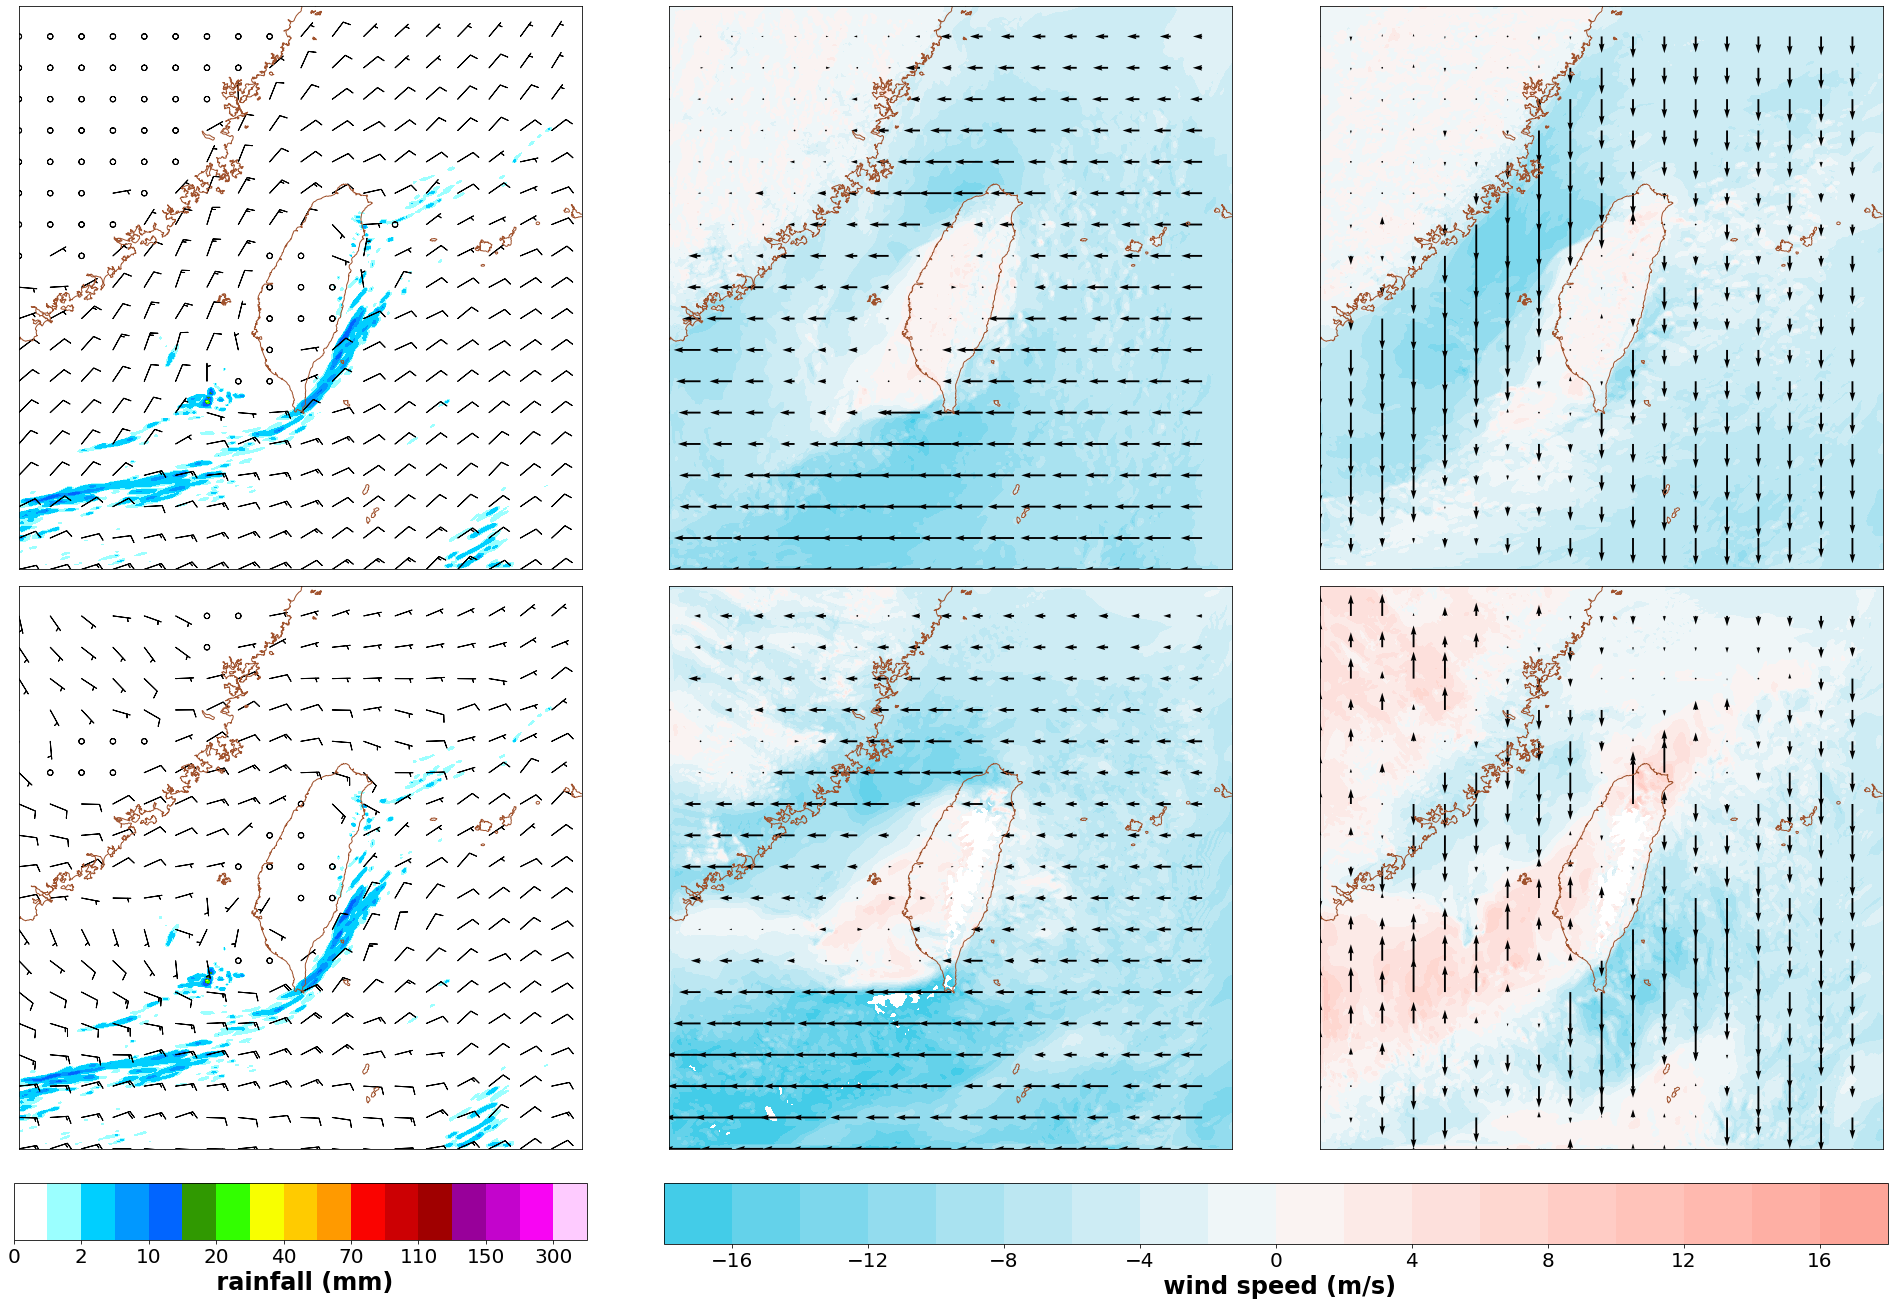

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cwbplot.cwb_colorbar as cwbcbar
import wrf
import netCDF4 as nc4
import colorcet
from mpl_toolkits.axes_grid1 import make_axes_locatable

fn = nc4.Dataset("wrfout2")
rainfall = fn["RAINNC"][0] + fn["RAINC"][0] + fn["RAINSH"][0]
lat = fn["XLAT"][0]
lon = fn["XLONG"][0]
pressure = wrf.getvar(fn,"pressure")
u = wrf.getvar(fn,"ua")
v =wrf.getvar(fn,"va")
u850 = wrf.interplevel(u,pressure,850).data
v850 =wrf.interplevel(v,pressure,850).data
u10 = fn["U10"][0]
v10 = fn["V10"][0]
uvmin = min(u10.min(),v10.min(),u850.min(),v850.min())
uvmax = max(u10.max(),v10.max(),u850.max(),v850.max())

if uvmin < 0 and uvmax >= 0:
    realmax = max(abs(uvmin),uvmax)
    uvmin = -(int(realmax)+1)
    uvmax = int(realmax)+1

levels = list(range(uvmin,uvmax+1,2))
zerouv = np.zeros(u10.shape)

tows = lambda uw,vw: (uw**2+vw**2)**0.5
ws850 = tows(u850,v850)
ws10 = tows(u10,v10)

proj = wrf.get_basemap(pressure, resolution="h")

raincbar = cwbcbar.rain(style="NPD")

fig, axs = plt.subplots(2,3, figsize=(27,18),constrained_layout=True)
cnt = 0
gap=25
windcmap =colorcet.cm.diverging_tritanopic_cwr_75_98_c20
for ax in axs.flatten():
    proj.drawcoastlines(linewidth=1, color='sienna',ax=ax)
    if cnt%3 == 0:
        rainctf = proj.contourf(lon,lat,rainfall, **raincbar,ax=ax,latlon=True)
        if cnt == 0:
            proj.barbs(lon[::gap,::gap],lat[::gap,::gap],u10[::gap,::gap],v10[::gap,::gap],length=6, ax=ax,latlon=True)
        else:
            proj.barbs(lon[::gap,::gap],lat[::gap,::gap],u850[::gap,::gap],v850[::gap,::gap], length=6,ax=ax,latlon=True)
    elif cnt ==1:
        windctf = proj.contourf(lon,lat,u10,ax=ax,cmap=windcmap,levels=levels, latlon=True)
        proj.quiver(lon[::gap,::gap],lat[::gap,::gap],u10[::gap,::gap], zerouv[::gap,::gap], ax=ax,latlon=True)
    elif cnt ==2:
        windctf = proj.contourf(lon,lat,v10,ax=ax,cmap=windcmap,levels=levels, latlon=True)
        proj.quiver(lon[::gap,::gap],lat[::gap,::gap],zerouv[::gap,::gap],v10[::gap,::gap],  ax=ax,latlon=True)
    elif cnt ==4:
        windctf = proj.contourf(lon,lat,u850,ax=ax,cmap=windcmap,levels=levels, latlon=True)
        proj.quiver(lon[::gap,::gap],lat[::gap,::gap],u850[::gap,::gap], zerouv[::gap,::gap], ax=ax,latlon=True)
    elif cnt ==5:
        windctf = proj.contourf(lon,lat,v850,ax=ax,cmap=windcmap,levels=levels, latlon=True)
        proj.quiver(lon[::gap,::gap],lat[::gap,::gap],zerouv[::gap,::gap],v850[::gap,::gap], ax=ax,latlon=True)
    cnt+=1

cbar = fig.colorbar(rainctf, ax=[axs[1, 0]], aspect=10,shrink=0.9,location='bottom')
cbar.set_label(label=' rainfall (mm)', size=24, weight='bold')
cbar.ax.tick_params(labelsize=20)
cbar = fig.colorbar(windctf, ax= axs[1, 1:],shrink=0.95,location='bottom')
cbar.set_label(label=' wind speed (m/s)', size=24, weight='bold')
cbar.ax.tick_params(labelsize=20)
plt.savefig("two_colorbar.png",dpi=300,format="png")

<Figure size 432x288 with 0 Axes>